# 로제타스톤 프로젝트

In [1]:
# 임포트 판다스

import pandas as pd
from pandas import DataFrame, Series

## 엑셀파일 불러오기 

In [2]:
df = pd.read_excel('Documents2.xlsx')

In [3]:
df.head(3)

,번호,연구분야대분류,연구분야중분류,기준년도,사업부처,연구개발단계,사업화형태,연구수행주체,정부투자연구비합계,지원과제수,사업화성과건수합계,고용창출인원합계,당해년도매출액합계
0,1,EA,EA01,2013,과학기술정보통신부,1기초연구,NaN,기타,1.010000e+08,1,0,0.0,0.0
1,2,EA,EA01,2013,과학기술정보통신부,1기초연구,NaN,대학,4.761042e+09,27,0,0.0,0.0
2,3,EA,EA01,2013,과학기술정보통신부,1기초연구,NaN,출연연구소,6.961235e+10,30,0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56925 entries, 0 to 56924
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   번호         56925 non-null  int64  
 1   연구분야대분류    56489 non-null  object 
 2   연구분야중분류    56925 non-null  object 
 3   기준년도       56925 non-null  int64  
 4   사업부처       56925 non-null  object 
 5   연구개발단계     56925 non-null  object 
 6   사업화형태      10987 non-null  object 
 7   연구수행주체     56925 non-null  object 
 8   정부투자연구비합계  56925 non-null  float64
 9   지원과제수      56925 non-null  int64  
 10  사업화성과건수합계  56925 non-null  int64  
 11  고용창출인원합계   56925 non-null  float64
 12  당해년도매출액합계  56925 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 5.6+ MB


## missing data 처리 
- 자신만의 기준 설정하고 처리하기

In [5]:
df_raw2 = df.dropna(subset=['사업화형태'])
df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10987 entries, 3 to 56897
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   번호         10987 non-null  int64  
 1   연구분야대분류    10972 non-null  object 
 2   연구분야중분류    10987 non-null  object 
 3   기준년도       10987 non-null  int64  
 4   사업부처       10987 non-null  object 
 5   연구개발단계     10987 non-null  object 
 6   사업화형태      10987 non-null  object 
 7   연구수행주체     10987 non-null  object 
 8   정부투자연구비합계  10987 non-null  float64
 9   지원과제수      10987 non-null  int64  
 10  사업화성과건수합계  10987 non-null  int64  
 11  고용창출인원합계   10987 non-null  float64
 12  당해년도매출액합계  10987 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 1.2+ MB


In [6]:
df_raw2['사업화형태'].value_counts()

기술보유자의 직접사업화_기존업체-상품화     4862
기술보유자의 직접사업화_기존업체-공정개선    1587
기술이전_기존업체-상품화             1568
기술이전_기존업체-공정개선            1323
기술보유자의 직접사업화_창업           1250
기술이전_창업                    397
Name: 사업화형태, dtype: int64

In [7]:
#help(df.dropna)

## 조건에 맞는 데이터 추출

In [8]:
# and, or 논리 연산자 (logic operator)

condition1 = (df_raw2['당해년도매출액합계'] > 0) 
condition2 = (df_raw2['고용창출인원합계']>5 )
condition3 = (df_raw2['지원과제수']>3)

In [9]:
condition1 & condition2

3        False
8        False
9        False
18       False
21       False
         ...  
56884    False
56894    False
56895    False
56896    False
56897    False
Length: 10987, dtype: bool

In [10]:
df_raw3 = df_raw2[condition1 & condition2 & condition3]

In [11]:
df_raw3.to_excel('test_01.xlsx')

## 컬럼 필터

In [12]:
#help(DataFrame)

In [14]:
df2 = df[['연구분야대분류','번호',  '연구분야중분류',
          '사업부처', '연구개발단계', '사업화형태', '연구수행주체',
          '정부투자연구비합계', '지원과제수', '사업화성과건수합계', 
          '고용창출인원합계', '당해년도매출액합계']]
df2.head(3)

,연구분야대분류,번호,연구분야중분류,사업부처,연구개발단계,사업화형태,연구수행주체,정부투자연구비합계,지원과제수,사업화성과건수합계,고용창출인원합계,당해년도매출액합계
0,EA,1,EA01,과학기술정보통신부,1기초연구,NaN,기타,1.010000e+08,1,0,0.0,0.0
1,EA,2,EA01,과학기술정보통신부,1기초연구,NaN,대학,4.761042e+09,27,0,0.0,0.0
2,EA,3,EA01,과학기술정보통신부,1기초연구,NaN,출연연구소,6.961235e+10,30,0,0.0,0.0


## 소팅

In [15]:
df3 = df2.sort_values(by=['사업부처','연구개발단계'], ascending=[True,True])
df3.head(3)

,연구분야대분류,번호,연구분야중분류,사업부처,연구개발단계,사업화형태,연구수행주체,정부투자연구비합계,지원과제수,사업화성과건수합계,고용창출인원합계,당해년도매출액합계
5060,EA,5061,EA99,경찰청,1기초연구,NaN,대학,40000000.0,1,0,0.0,0.0
12505,ED,12506,ED08,경찰청,1기초연구,NaN,대학,149000000.0,1,0,0.0,0.0
12540,ED,12541,ED08,경찰청,1기초연구,NaN,대학,227000000.0,1,0,0.0,0.0


## 그룹바이

In [16]:
df4=df3.groupby(['사업부처','연구개발단계']).sum()[['정부투자연구비합계','지원과제수','사업화성과건수합계']]
#df4.head(3)
# sum(), count(), mean(), std(), 
df4

정부투자연구비합계  지원과제수  사업화성과건수합계
사업부처      연구개발단계                                
경찰청       1기초연구   8.141700e+09     28          0
          2개발연구   1.872629e+10     65          0
          3응용연구   8.165708e+09     28          0
          4기타     1.898300e+09     11          0
과학기술정보통신부 1기초연구   1.763760e+13  69598        420
...                        ...    ...        ...
행정안전부     4기타     1.033285e+11    154          1
환경부       1기초연구   7.040370e+11   4106       1864
          2개발연구   5.858003e+11   4424       3523
          3응용연구   3.079538e+11   1972       1181
          4기타     4.047477e+11    723        182

[98 rows x 3 columns]

In [17]:
df4.index

MultiIndex([(      '경찰청', '1기초연구'),
            (      '경찰청', '2개발연구'),
            (      '경찰청', '3응용연구'),
            (      '경찰청',   '4기타'),
            ('과학기술정보통신부', '1기초연구'),
            ('과학기술정보통신부', '2개발연구'),
            ('과학기술정보통신부', '3응용연구'),
            ('과학기술정보통신부',   '4기타'),
            (      '교육부', '1기초연구'),
            (      '교육부', '2개발연구'),
            (      '교육부', '3응용연구'),
            (      '교육부',   '4기타'),
            (      '국방부', '2개발연구'),
            (      '국방부', '3응용연구'),
            (      '국방부',   '4기타'),
            (    '국토교통부', '1기초연구'),
            (    '국토교통부', '2개발연구'),
            (    '국토교통부', '3응용연구'),
            (    '국토교통부',   '4기타'),
            (      '기상청', '1기초연구'),
            (      '기상청', '2개발연구'),
            (      '기상청', '3응용연구'),
            (      '기상청',   '4기타'),
            (    '기획재정부', '1기초연구'),
            (    '기획재정부',   '4기타'),
            (  '농림축산식품부', '1기초연구'),
            (  '농림축산식품부', '2개발연구'),
            (  '농림축산식품부', '3

## 테스트

In [18]:
condition1 = (df4.index == '과학기술정보통신부')
condition1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [19]:
df_filter1 = df4[df4.index == '과학기술정보통신부']
df_filter1

,,정부투자연구비합계,지원과제수,사업화성과건수합계
사업부처,연구개발단계,,,


In [20]:
%matplotlib inline  
%config InlineBackend.figure_format = 'retina' # 맥용 레티나 화면 

import matplotlib.font_manager as fm #한글 출력
import matplotlib

font8  = fm.FontProperties(fname = '/Library/Fonts/NanumGothic.otf', size=8)
print(font8.get_name())
matplotlib.rc('font', family=font8.get_name())

NanumGothicOTF


IndexError: list index out of range

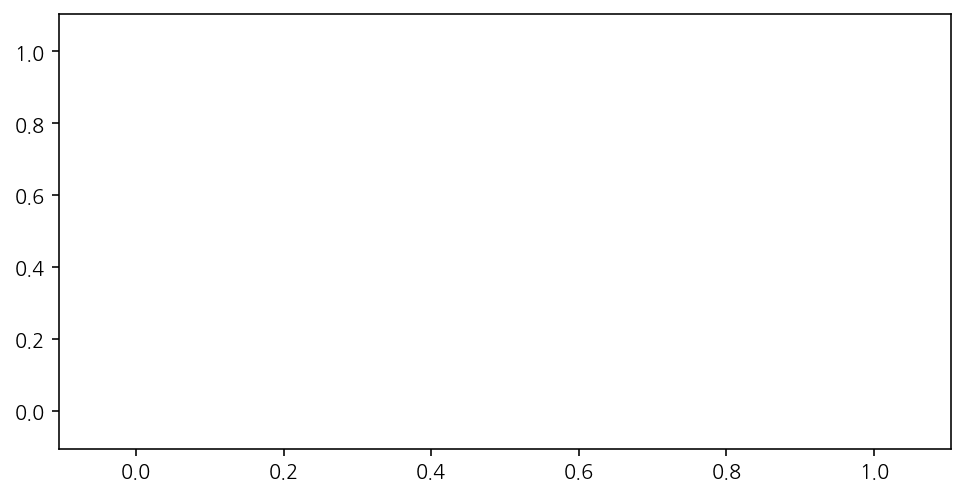

In [21]:
df_filter1[['지원과제수','사업화성과건수합계']].plot(kind='bar', title='Sample', figsize=(8,4))